## Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#load data enconding the special characters
df = pd.read_csv('C:/Users/herna/Documents/HERNÁN/Data Analysis/PGP Data Analytics/3_Courses (7)/7_Data Analyst Capstone/Project 3 - Marketing/Zomato Data.csv', encoding='latin-1')

## EDA

In [3]:
#top 5
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,4,4.8,Dark Green,Excellent,229


In [4]:
#data types and columns names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [5]:
#data shape (rows, columns)
df.shape

(9551, 19)

In [6]:
#unique values --> only ID as it should be
df.nunique(axis=0)

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [7]:
#nulls
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
#drop any row with null values (9)
df = df.dropna(how = 'any', axis = 0)

In [9]:
#new shape, with 9 rows deleted
df.shape

(9542, 19)

In [10]:
#summary of count, min, max, mean, st dev for numerical values
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [11]:
#duplicates
df.duplicated().sum()

0

In [12]:
# df[(df['Aggregate rating'] == 0)]

In [13]:
#eliminate 0.0 ratings
#inplace to make it permanent

df.drop(df[df['Aggregate rating'] ==0].index, inplace = True)

In [14]:
#new shape, with 0.0 rating deleted
df.shape

(7394, 19)

## Geographical Distribution

In [15]:
df['Country Code'].value_counts()

1      6513
216     422
215      79
214      60
189      60
30       55
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

#### country code = 1 --> India
#### country code = 216 --> USA

In [16]:
df['City'].value_counts()

New Delhi         4048
Gurgaon            890
Noida              696
Faridabad          151
Ghaziabad           23
                  ... 
Lincoln              1
Lakeview             1
Lakes Entrance       1
Inverloch            1
Panchkula            1
Name: City, Length: 140, dtype: int64

#### as presumed, most of them are Indian cities

## Ratings Distribution

In [17]:
df['Aggregate rating'].value_counts()

3.2    522
3.1    519
3.4    495
3.3    483
3.5    480
3.0    468
3.6    458
3.7    427
3.8    399
2.9    381
3.9    332
2.8    315
4.1    274
4.0    266
2.7    250
4.2    221
2.6    191
4.3    174
4.4    143
2.5    110
4.5     95
2.4     87
4.6     78
4.9     61
2.3     47
4.7     41
2.2     27
4.8     25
2.1     15
2.0      7
1.9      2
1.8      1
Name: Aggregate rating, dtype: int64

#### Rating moves between 3.0 and 3.7 mostly

In [18]:
df['Rating color'].value_counts()

Orange        3734
Yellow        2096
Green         1078
Dark Green     300
Red            186
Name: Rating color, dtype: int64

#### Orange rating color gets the most frequency

In [19]:
df.groupby(['Rating color'])['Aggregate rating'].mean()

Rating color
Dark Green    4.659667
Green         4.167904
Orange        3.051339
Red           2.297849
Yellow        3.683063
Name: Aggregate rating, dtype: float64

#### Rating average per Rating color

## Restaurant Presence

In [20]:
#top 10 restaurants
df['Restaurant Name'].value_counts().head(10)

Domino's Pizza      74
Cafe Coffee Day     67
Subway              61
McDonald's          47
Green Chick Chop    44
Pizza Hut           29
Keventers           29
Barbeque Nation     26
Giani               24
Barista             21
Name: Restaurant Name, dtype: int64

<AxesSubplot:>

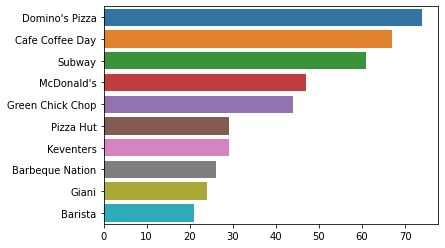

In [21]:
#use rest name as index, presence as values
sns.barplot(y = df['Restaurant Name'].value_counts().head(10).index, x = df['Restaurant Name'].value_counts().head(10).values)

## Delivery Providers

In [22]:
df['Has Online delivery'].value_counts()

No     5039
Yes    2355
Name: Has Online delivery, dtype: int64

## Table Booking

In [23]:
df['Has Table booking'].value_counts()

No     6283
Yes    1111
Name: Has Table booking, dtype: int64

## Both delivery and table booking

In [24]:
df.value_counts(['Has Online delivery', 'Has Table booking'])

Has Online delivery  Has Table booking
No                   No                   4361
Yes                  No                   1922
No                   Yes                   678
Yes                  Yes                   433
dtype: int64

## Comparison of no. of votes for delivery and table booking

<AxesSubplot:xlabel='Aggregate rating'>

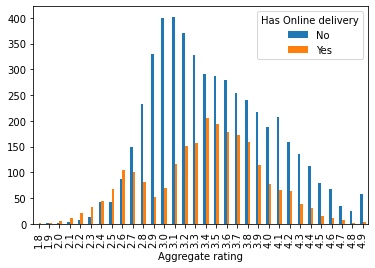

In [25]:
pd.crosstab(df['Aggregate rating'], df['Has Online delivery']).plot.bar()

## Cuisines Presence

In [26]:
#top 10 cuisines combinations
df['Cuisines'].value_counts().head(10)

North Indian                      492
North Indian, Chinese             397
North Indian, Mughlai             294
Cafe                              252
Fast Food                         228
Chinese                           224
North Indian, Mughlai, Chinese    164
Bakery                            130
Bakery, Desserts                  116
Pizza, Fast Food                  113
Name: Cuisines, dtype: int64

<AxesSubplot:>

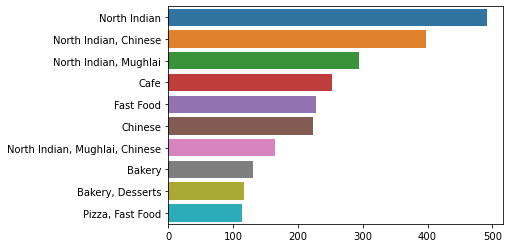

In [27]:
sns.barplot(y = df['Cuisines'].value_counts().head(10).index, x = df['Cuisines'].value_counts().head(10).values)

## Max and Min no. of cuisines provided

In [28]:
df['Cuisines'].str.split(',').apply(len).value_counts()

2    2737
1    2224
3    1603
4     557
5     160
6      72
7      28
8      13
Name: Cuisines, dtype: int64

<AxesSubplot:>

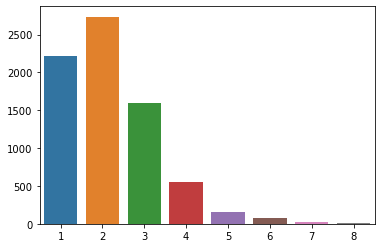

In [29]:
sns.barplot(x = df['Cuisines'].str.split(',').apply(len).value_counts().index, y = df['Cuisines'].str.split(',').apply(len).value_counts().values)

## No. of Cuisines and Avg. Rating

In [30]:
df.groupby([df['Cuisines'].str.split(',').apply(len)])['Aggregate rating'].mean()

Cuisines
1    3.404182
2    3.389003
3    3.488584
4    3.581149
5    3.598125
6    3.775000
7    3.671429
8    3.684615
Name: Aggregate rating, dtype: float64

<AxesSubplot:xlabel='Cuisines'>

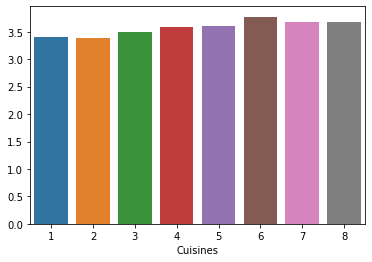

In [31]:
sns.barplot(x = df.groupby([df['Cuisines'].str.split(',').apply(len)])['Aggregate rating'].mean().index, y = df.groupby([df['Cuisines'].str.split(',').apply(len)])['Aggregate rating'].mean().values)

##### No. of cuisines offered affect directly the rating

## Agg Rating and Votes

In [32]:
df.groupby([df['Votes'].value_counts()])['Aggregate rating'].mean()

Votes
1.0      3.620207
2.0      3.900000
3.0      3.925676
4.0      3.942222
5.0      4.059375
           ...   
135.0    4.900000
154.0    4.000000
164.0    4.400000
168.0    4.200000
207.0    4.800000
Name: Aggregate rating, Length: 68, dtype: float64

<AxesSubplot:xlabel='Votes'>

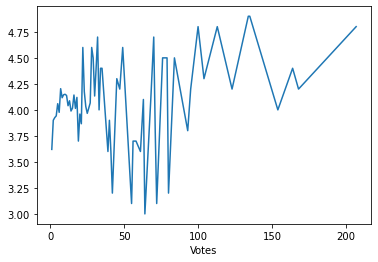

In [33]:
df.groupby([df['Votes'].value_counts()])['Aggregate rating'].mean().plot()

##### It looks like there is no relation between the amount of votes and the aggregate rating

## Save clean file

In [34]:
df.to_csv('C:/Users/herna/Documents/HERNÁN/Data Analysis/PGP Data Analytics/3_Courses (7)/7_Data Analyst Capstone/Project 3 - Marketing/Zomato Data Clean.csv', index = False)